<a href="https://colab.research.google.com/github/RestianaA/Trash-Segmentation/blob/main/Train_YOLOv11_Instance_Segmentation_using_WasteIn_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Sat Jun  7 07:38:55 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
!pip install ultralytics
!pip install opencv-python

In [ ]:
from ultralytics import YOLO
from IPython.display import Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="wS05oii7vyVXHOBDRUQs")
project = rf.workspace("ai-projects-r9oea").project("waste-in-instance-segmentation")
version = project.version(1)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
dataset.location

'/content/Waste-In-Instance-Segmentation-1'

In [ ]:
#Load the YOLO11-Seg Model
model = YOLO("yolo11s-seg.pt")

100%|██████████| 19.7M/19.7M [00:00<00:00, 84.2MB/s]


In [ ]:
#Train the Model on a Custom Dataset
results = model.train(task='segment', mode = 'train', data = "/content/Waste-In-Instance-Segmentation-1/data.yaml", epochs = 50)

Ultralytics 8.3.151 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Waste-In-Instance-Segmentation-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=

100%|██████████| 755k/755k [00:00<00:00, 22.6MB/s]

Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics

 19                  -1  1    345472  ultralytics.nn.modules.block.C3k2            [384, 256, 1, False]          
 20                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
 21            [-1, 10]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 22                  -1  1   1511424  ultralytics.nn.modules.block.C3k2            [768, 512, 1, True]           
 23        [16, 19, 22]  1   1476226  ultralytics.nn.modules.head.Segment          [6, 32, 128, [128, 256, 512]] 
YOLO11s-seg summary: 203 layers, 10,084,610 parameters, 10,084,594 gradients, 35.6 GFLOPs

Transferred 555/561 items from pretrained weights
Freezing layer 'model.23.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 99.9MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 156.6±141.7 MB/s, size: 5.1 KB)


train: Scanning /content/Waste-In-Instance-Segmentation-1/train/labels... 839 images, 1 backgrounds, 0 corrupt: 100%|██████████| 839/839 [00:00<00:00, 1987.87it/s]

train: New cache created: /content/Waste-In-Instance-Segmentation-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 103.7±35.1 MB/s, size: 3.9 KB)


val: Scanning /content/Waste-In-Instance-Segmentation-1/valid/labels... 240 images, 0 backgrounds, 0 corrupt: 100%|██████████| 240/240 [00:00<00:00, 1101.30it/s]

val: New cache created: /content/Waste-In-Instance-Segmentation-1/valid/labels.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.84G     0.7044      1.741      2.586      1.178         22        640: 100%|██████████| 53/53 [00:27<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.30it/s]

                   all        240        282      0.308      0.468       0.38      0.264      0.311      0.468       0.38      0.251



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      6.09G     0.7013      1.302       1.54      1.162         20        640: 100%|██████████| 53/53 [00:21<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.47it/s]

                   all        240        282      0.279      0.516      0.356      0.201      0.209       0.49      0.277      0.137



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      6.13G     0.7973      1.363      1.507      1.223         27        640: 100%|██████████| 53/53 [00:21<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.51it/s]

                   all        240        282      0.682      0.261      0.248      0.136      0.669      0.212      0.225      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.17G      0.808      1.453      1.427      1.232         22        640: 100%|██████████| 53/53 [00:21<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.54it/s]

                   all        240        282      0.406      0.326      0.275      0.163      0.397      0.318      0.271      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      6.21G     0.7896      1.438      1.374      1.227         26        640: 100%|██████████| 53/53 [00:21<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.51it/s]

                   all        240        282      0.449      0.612      0.502      0.333      0.445      0.601      0.491      0.343



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      6.23G     0.7742       1.29       1.32      1.211         21        640: 100%|██████████| 53/53 [00:21<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.52it/s]

                   all        240        282      0.325      0.328      0.145     0.0699      0.215      0.272     0.0976     0.0433



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50       6.3G     0.7492      1.306      1.293      1.188         16        640: 100%|██████████| 53/53 [00:21<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.45it/s]

                   all        240        282      0.552      0.732      0.671      0.471      0.549      0.723      0.657      0.493



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      6.34G     0.7025      1.314      1.212      1.163         25        640: 100%|██████████| 53/53 [00:21<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.44it/s]

                   all        240        282      0.505      0.564      0.591      0.435      0.504      0.578      0.594      0.469



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.38G     0.6874       1.17      1.177      1.151         19        640: 100%|██████████| 53/53 [00:21<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.38it/s]

                   all        240        282      0.385       0.49      0.414      0.304      0.385      0.486      0.409      0.308



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      6.41G     0.7035       1.28      1.178      1.182         17        640: 100%|██████████| 53/53 [00:21<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.41it/s]

                   all        240        282      0.664      0.414      0.526      0.393       0.66      0.408      0.504      0.389



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.47G     0.6714       1.19      1.106      1.146         18        640: 100%|██████████| 53/53 [00:21<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.37it/s]

                   all        240        282      0.672      0.337      0.433      0.305      0.689      0.308        0.4      0.268



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50      6.52G     0.6757      1.186      1.159      1.151         19        640: 100%|██████████| 53/53 [00:21<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.39it/s]

                   all        240        282      0.653      0.729      0.779       0.58      0.648      0.721      0.763      0.619



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      6.56G     0.6361      1.134      1.096      1.124         18        640: 100%|██████████| 53/53 [00:21<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.38it/s]

                   all        240        282      0.615      0.626      0.679        0.5      0.582      0.593      0.634      0.449



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      6.58G     0.6246      1.147      1.015       1.11         27        640: 100%|██████████| 53/53 [00:21<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.28it/s]

                   all        240        282      0.624      0.532      0.613      0.458      0.633      0.528      0.605       0.48



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50      6.64G     0.6124      1.167      1.033      1.118         13        640: 100%|██████████| 53/53 [00:21<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.22it/s]

                   all        240        282      0.727      0.541      0.606      0.487      0.727      0.541      0.607      0.501



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      6.69G     0.6167      1.173       1.04      1.105         17        640: 100%|██████████| 53/53 [00:21<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.19it/s]

                   all        240        282      0.661      0.692      0.725      0.602      0.653      0.685      0.716      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.73G      0.614      1.073     0.9657      1.108         25        640: 100%|██████████| 53/53 [00:21<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.29it/s]

                   all        240        282      0.792      0.588      0.711      0.586      0.792      0.588      0.707      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      6.75G     0.5844      1.047      0.916       1.09         19        640: 100%|██████████| 53/53 [00:21<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.21it/s]

                   all        240        282      0.751      0.599      0.746      0.608      0.744      0.589      0.731      0.618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      6.81G     0.5981      1.058     0.9489      1.094         25        640: 100%|██████████| 53/53 [00:21<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.13it/s]

                   all        240        282      0.638      0.651      0.736      0.629      0.638      0.664      0.744      0.648



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      6.86G     0.5683      0.971     0.9043       1.07         27        640: 100%|██████████| 53/53 [00:21<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.16it/s]

                   all        240        282      0.633      0.616      0.688      0.577      0.642      0.616       0.69      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50       6.9G     0.5704     0.9976     0.8998      1.082         22        640: 100%|██████████| 53/53 [00:21<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.18it/s]

                   all        240        282      0.701      0.732      0.828      0.684      0.703      0.735      0.834      0.731



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      6.93G     0.5623      1.008     0.8703       1.07         25        640: 100%|██████████| 53/53 [00:21<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.12it/s]

                   all        240        282      0.757      0.792      0.857      0.714      0.779      0.784      0.858      0.737



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      6.99G     0.5395      1.011     0.8415       1.07         20        640: 100%|██████████| 53/53 [00:21<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.23it/s]

                   all        240        282      0.798      0.721      0.851       0.73      0.796      0.716       0.85       0.74



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      7.03G     0.5756      1.079     0.8569      1.069         28        640: 100%|██████████| 53/53 [00:21<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.21it/s]

                   all        240        282      0.635      0.649      0.726        0.6      0.628      0.647      0.725      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      7.08G     0.5356     0.9575     0.8228      1.054         20        640: 100%|██████████| 53/53 [00:21<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.27it/s]

                   all        240        282      0.805      0.744      0.853      0.728      0.793      0.756      0.853      0.734



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50       7.1G     0.5263       0.94     0.7811      1.056         30        640: 100%|██████████| 53/53 [00:21<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.24it/s]

                   all        240        282      0.802      0.754      0.855      0.745      0.802      0.754      0.856      0.749



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      7.16G     0.5037     0.9229     0.7353      1.042         28        640: 100%|██████████| 53/53 [00:21<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.22it/s]

                   all        240        282      0.795      0.784      0.873      0.751      0.787      0.778      0.863      0.767



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      7.21G     0.5029     0.9015     0.7355      1.028         23        640: 100%|██████████| 53/53 [00:21<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.25it/s]

                   all        240        282      0.745      0.732      0.827      0.723      0.741      0.731      0.836      0.738



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      7.25G     0.5033     0.9139     0.6969      1.029         20        640: 100%|██████████| 53/53 [00:21<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.22it/s]

                   all        240        282      0.794      0.754      0.863      0.737       0.79      0.756      0.865       0.77



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      7.28G     0.5162     0.8954     0.7153      1.038         20        640: 100%|██████████| 53/53 [00:21<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.20it/s]

                   all        240        282      0.843      0.733       0.85       0.73      0.846      0.736      0.852      0.748



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      7.34G     0.5017     0.9097     0.7199      1.036         16        640: 100%|██████████| 53/53 [00:21<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.21it/s]

                   all        240        282      0.794      0.816      0.869      0.764      0.794      0.818      0.874      0.779



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      7.38G     0.4901     0.8715     0.7181      1.026         26        640: 100%|██████████| 53/53 [00:21<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.15it/s]

                   all        240        282      0.831      0.839      0.905      0.796      0.844      0.841      0.908       0.82



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.36G     0.4835     0.8746     0.6598      1.029         19        640: 100%|██████████| 53/53 [00:21<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.51it/s]

                   all        240        282      0.852      0.821      0.898      0.786       0.84      0.817      0.888      0.792



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      6.55G     0.4717      0.825     0.6564      1.012         15        640: 100%|██████████| 53/53 [00:21<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.32it/s]

                   all        240        282      0.833      0.802      0.892      0.789       0.83      0.798      0.884      0.796



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50      6.55G     0.4772     0.8627     0.6597      1.016         21        640: 100%|██████████| 53/53 [00:21<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.24it/s]

                   all        240        282      0.828      0.829      0.889      0.799      0.827      0.834      0.891      0.809



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.55G     0.4657     0.8046     0.6052      1.014         27        640: 100%|██████████| 53/53 [00:21<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.23it/s]

                   all        240        282       0.82      0.849      0.889      0.793      0.816      0.842      0.886      0.816



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.55G     0.4527     0.8087     0.6098      1.006         19        640: 100%|██████████| 53/53 [00:21<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.20it/s]

                   all        240        282      0.858      0.807      0.901      0.817      0.862       0.81      0.909      0.823



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.55G     0.4637     0.8022      0.581       1.01         18        640: 100%|██████████| 53/53 [00:21<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.20it/s]

                   all        240        282      0.854       0.82      0.907      0.814      0.858      0.823      0.908      0.828



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.55G     0.4458     0.7758     0.5615      1.001         22        640: 100%|██████████| 53/53 [00:21<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.19it/s]

                   all        240        282      0.865      0.834      0.907       0.81      0.843      0.824        0.9      0.817



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.55G     0.4362     0.8088     0.5895     0.9946         20        640: 100%|██████████| 53/53 [00:20<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.17it/s]

                   all        240        282      0.816      0.887       0.92      0.836      0.813      0.885      0.918      0.843


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.55G     0.3771     0.6998     0.5008      1.022          9        640: 100%|██████████| 53/53 [00:23<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.57it/s]

                   all        240        282      0.879      0.788      0.907      0.823      0.781      0.888      0.901      0.821



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.55G     0.3612     0.6769     0.4762      1.013          7        640: 100%|██████████| 53/53 [00:21<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.45it/s]

                   all        240        282      0.896      0.787      0.916      0.843      0.896      0.787      0.917      0.848



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.55G     0.3465      0.662     0.4506     0.9953          9        640: 100%|██████████| 53/53 [00:21<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.30it/s]

                   all        240        282      0.836      0.849      0.925      0.849      0.837      0.851      0.922      0.855



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      6.58G     0.3362     0.6424      0.398     0.9846         12        640: 100%|██████████| 53/53 [00:23<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:04<00:00,  1.98it/s]

                   all        240        282      0.885       0.85      0.936      0.863      0.871      0.861      0.935      0.862



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      6.63G     0.3235     0.5931     0.3753      0.973          7        640: 100%|██████████| 53/53 [00:22<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.60it/s]

                   all        240        282      0.865      0.861      0.932      0.857      0.869      0.866      0.936      0.861



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      6.66G     0.3178     0.5668     0.3922     0.9698          8        640: 100%|██████████| 53/53 [00:22<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.42it/s]

                   all        240        282      0.895      0.826      0.924      0.845      0.917      0.808      0.926      0.858



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      6.72G     0.3136      0.575     0.3631     0.9711          7        640: 100%|██████████| 53/53 [00:21<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.46it/s]

                   all        240        282       0.91      0.847      0.934      0.854      0.892      0.848      0.935      0.855



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50      6.76G     0.3167     0.5656     0.3502     0.9678         11        640: 100%|██████████| 53/53 [00:21<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.59it/s]

                   all        240        282      0.888      0.863      0.938      0.853      0.856      0.897      0.933      0.857



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50       6.8G     0.3054     0.5422     0.3275     0.9557          8        640: 100%|██████████| 53/53 [00:22<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.39it/s]

                   all        240        282      0.891      0.877      0.938      0.864      0.884      0.871      0.935      0.867



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50      6.83G     0.2911     0.5391     0.3414     0.9498          7        640: 100%|██████████| 53/53 [00:21<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.60it/s]

                   all        240        282      0.882      0.884       0.94      0.867      0.881      0.872      0.938       0.87



50 epochs completed in 0.356 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 20.5MB
Optimizer stripped from runs/segment/train/weights/best.pt, 20.5MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.151 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s-seg summary (fused): 113 layers, 10,069,138 parameters, 0 gradients, 35.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/8 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:07<00:00,  1.12it/s]


                   all        240        282      0.881      0.884       0.94      0.867      0.881      0.873      0.938       0.87
           Electronics         39         48      0.897      0.896      0.964      0.869      0.915      0.894      0.962      0.865
                 Glass         42         42      0.899       0.85      0.953      0.914      0.899      0.846      0.953      0.925
                 Metal         43         44      0.867      0.886      0.913      0.876      0.869      0.886      0.913      0.885
               Organic         44         76      0.821      0.786      0.854      0.656      0.806      0.765      0.847      0.668
                 Paper         41         41      0.912      0.951      0.985      0.934      0.891      0.927      0.981      0.914
               Plastic         31         31       0.89      0.935       0.97      0.952      0.905      0.923       0.97      0.964
Speed: 0.3ms preprocess, 6.8ms inference, 0.0ms loss, 5.0ms postproce

In [ ]:
!zip -r Waste-In-Instance-Segmentation-1.zip runs/segment/train/

  adding: runs/segment/train/ (stored 0%)
  adding: runs/segment/train/val_batch2_pred.jpg (deflated 29%)
  adding: runs/segment/train/val_batch2_labels.jpg (deflated 29%)
  adding: runs/segment/train/val_batch0_pred.jpg (deflated 26%)
  adding: runs/segment/train/BoxPR_curve.png (deflated 13%)
  adding: runs/segment/train/args.yaml (deflated 52%)
  adding: runs/segment/train/val_batch1_labels.jpg (deflated 27%)
  adding: runs/segment/train/MaskP_curve.png (deflated 10%)
  adding: runs/segment/train/BoxP_curve.png (deflated 10%)
  adding: runs/segment/train/BoxF1_curve.png (deflated 8%)
  adding: runs/segment/train/MaskPR_curve.png (deflated 14%)
  adding: runs/segment/train/train_batch2.jpg (deflated 10%)
  adding: runs/segment/train/confusion_matrix.png (deflated 24%)
  adding: runs/segment/train/results.csv (deflated 60%)
  adding: runs/segment/train/train_batch2121.jpg (deflated 15%)
  adding: runs/segment/train/MaskF1_curve.png (deflated 8%)
  adding: runs/segment/train/val_batch0

In [ ]:
from google.colab import files
files.download("Waste-In-Instance-Segmentation-1.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
train_path = "/content/runs/segment/train"

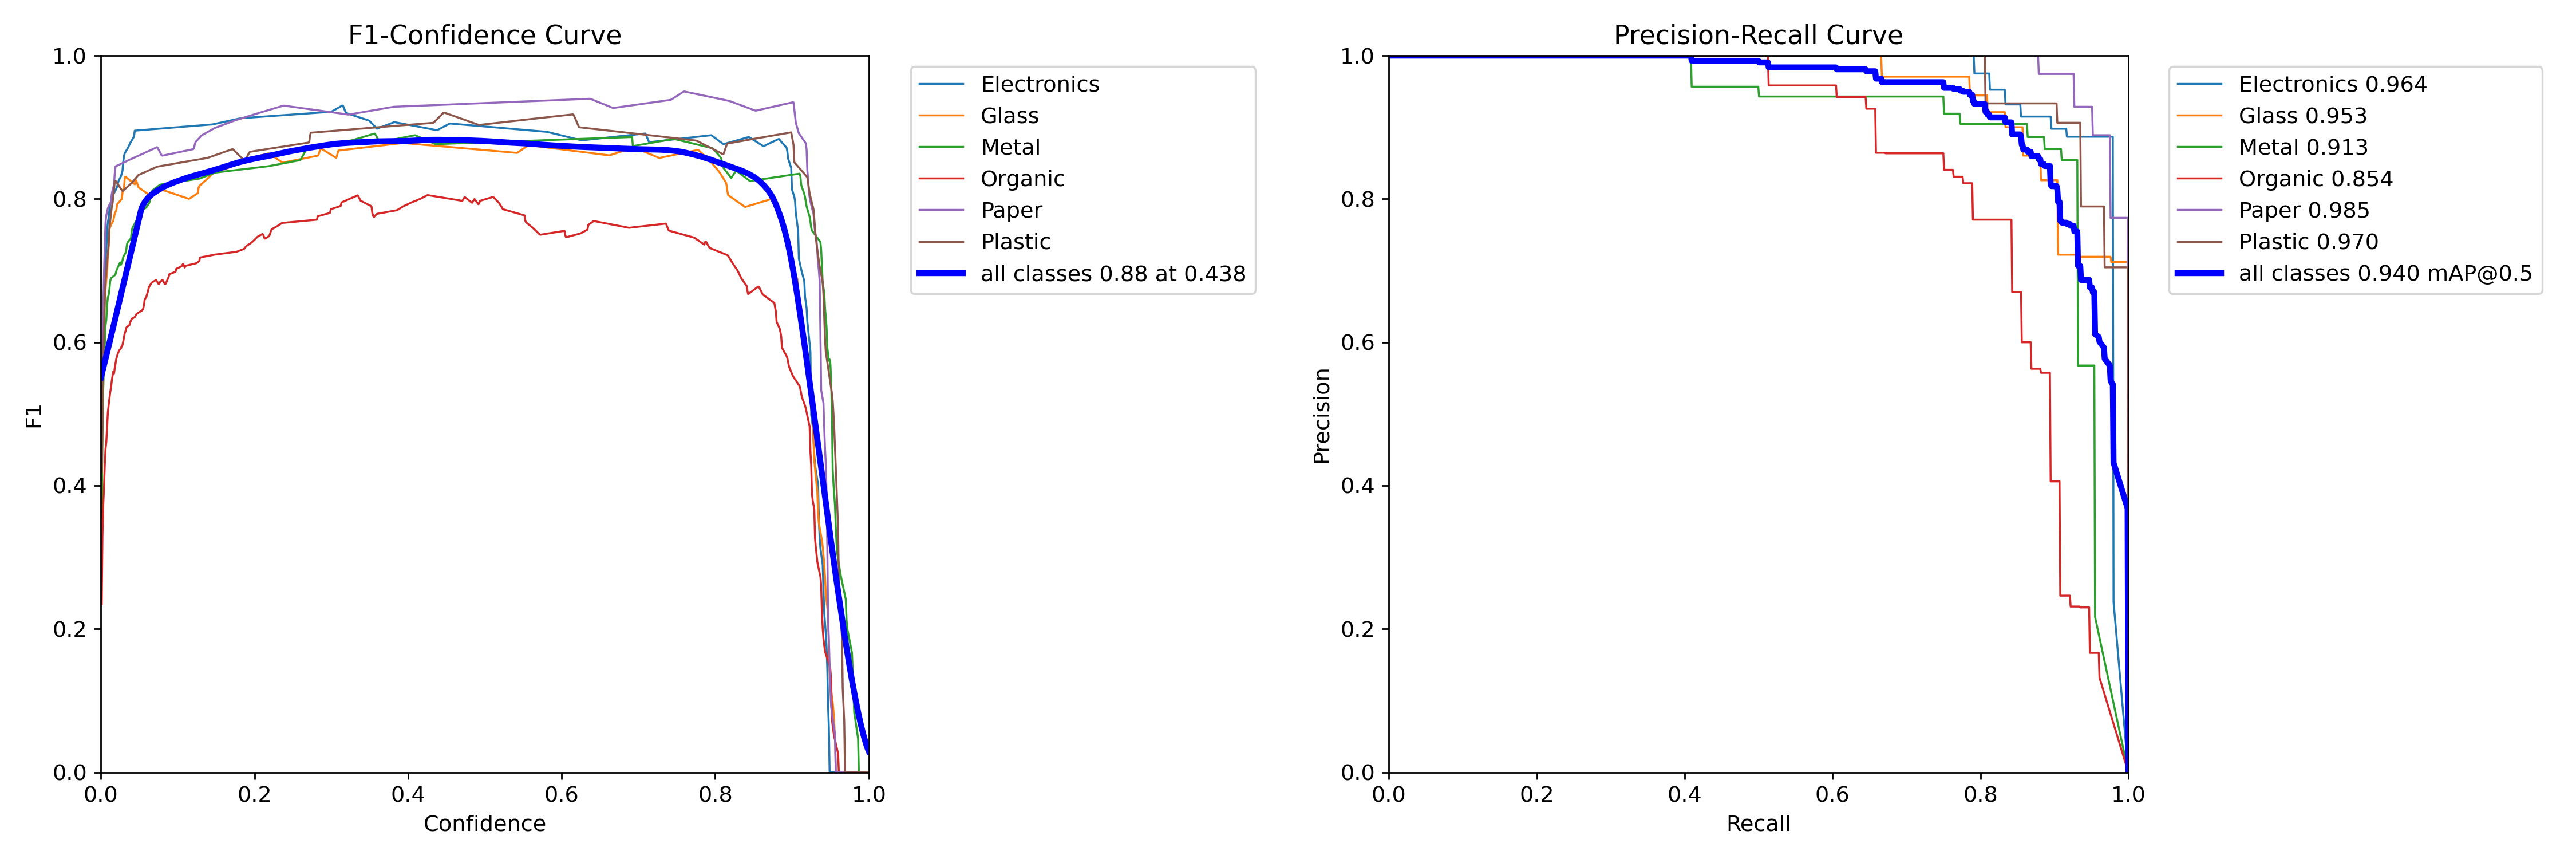

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
#Load your images using OpenCV
img1 = cv2.imread(f"{train_path}/BoxF1_curve.png")
img2 = cv2.imread(f"{train_path}/BoxPR_curve.png")

#Concatenate the images horizontally
top_row = cv2.hconcat([img1, img2])

#Display the concatenated images
cv2_imshow(top_row)

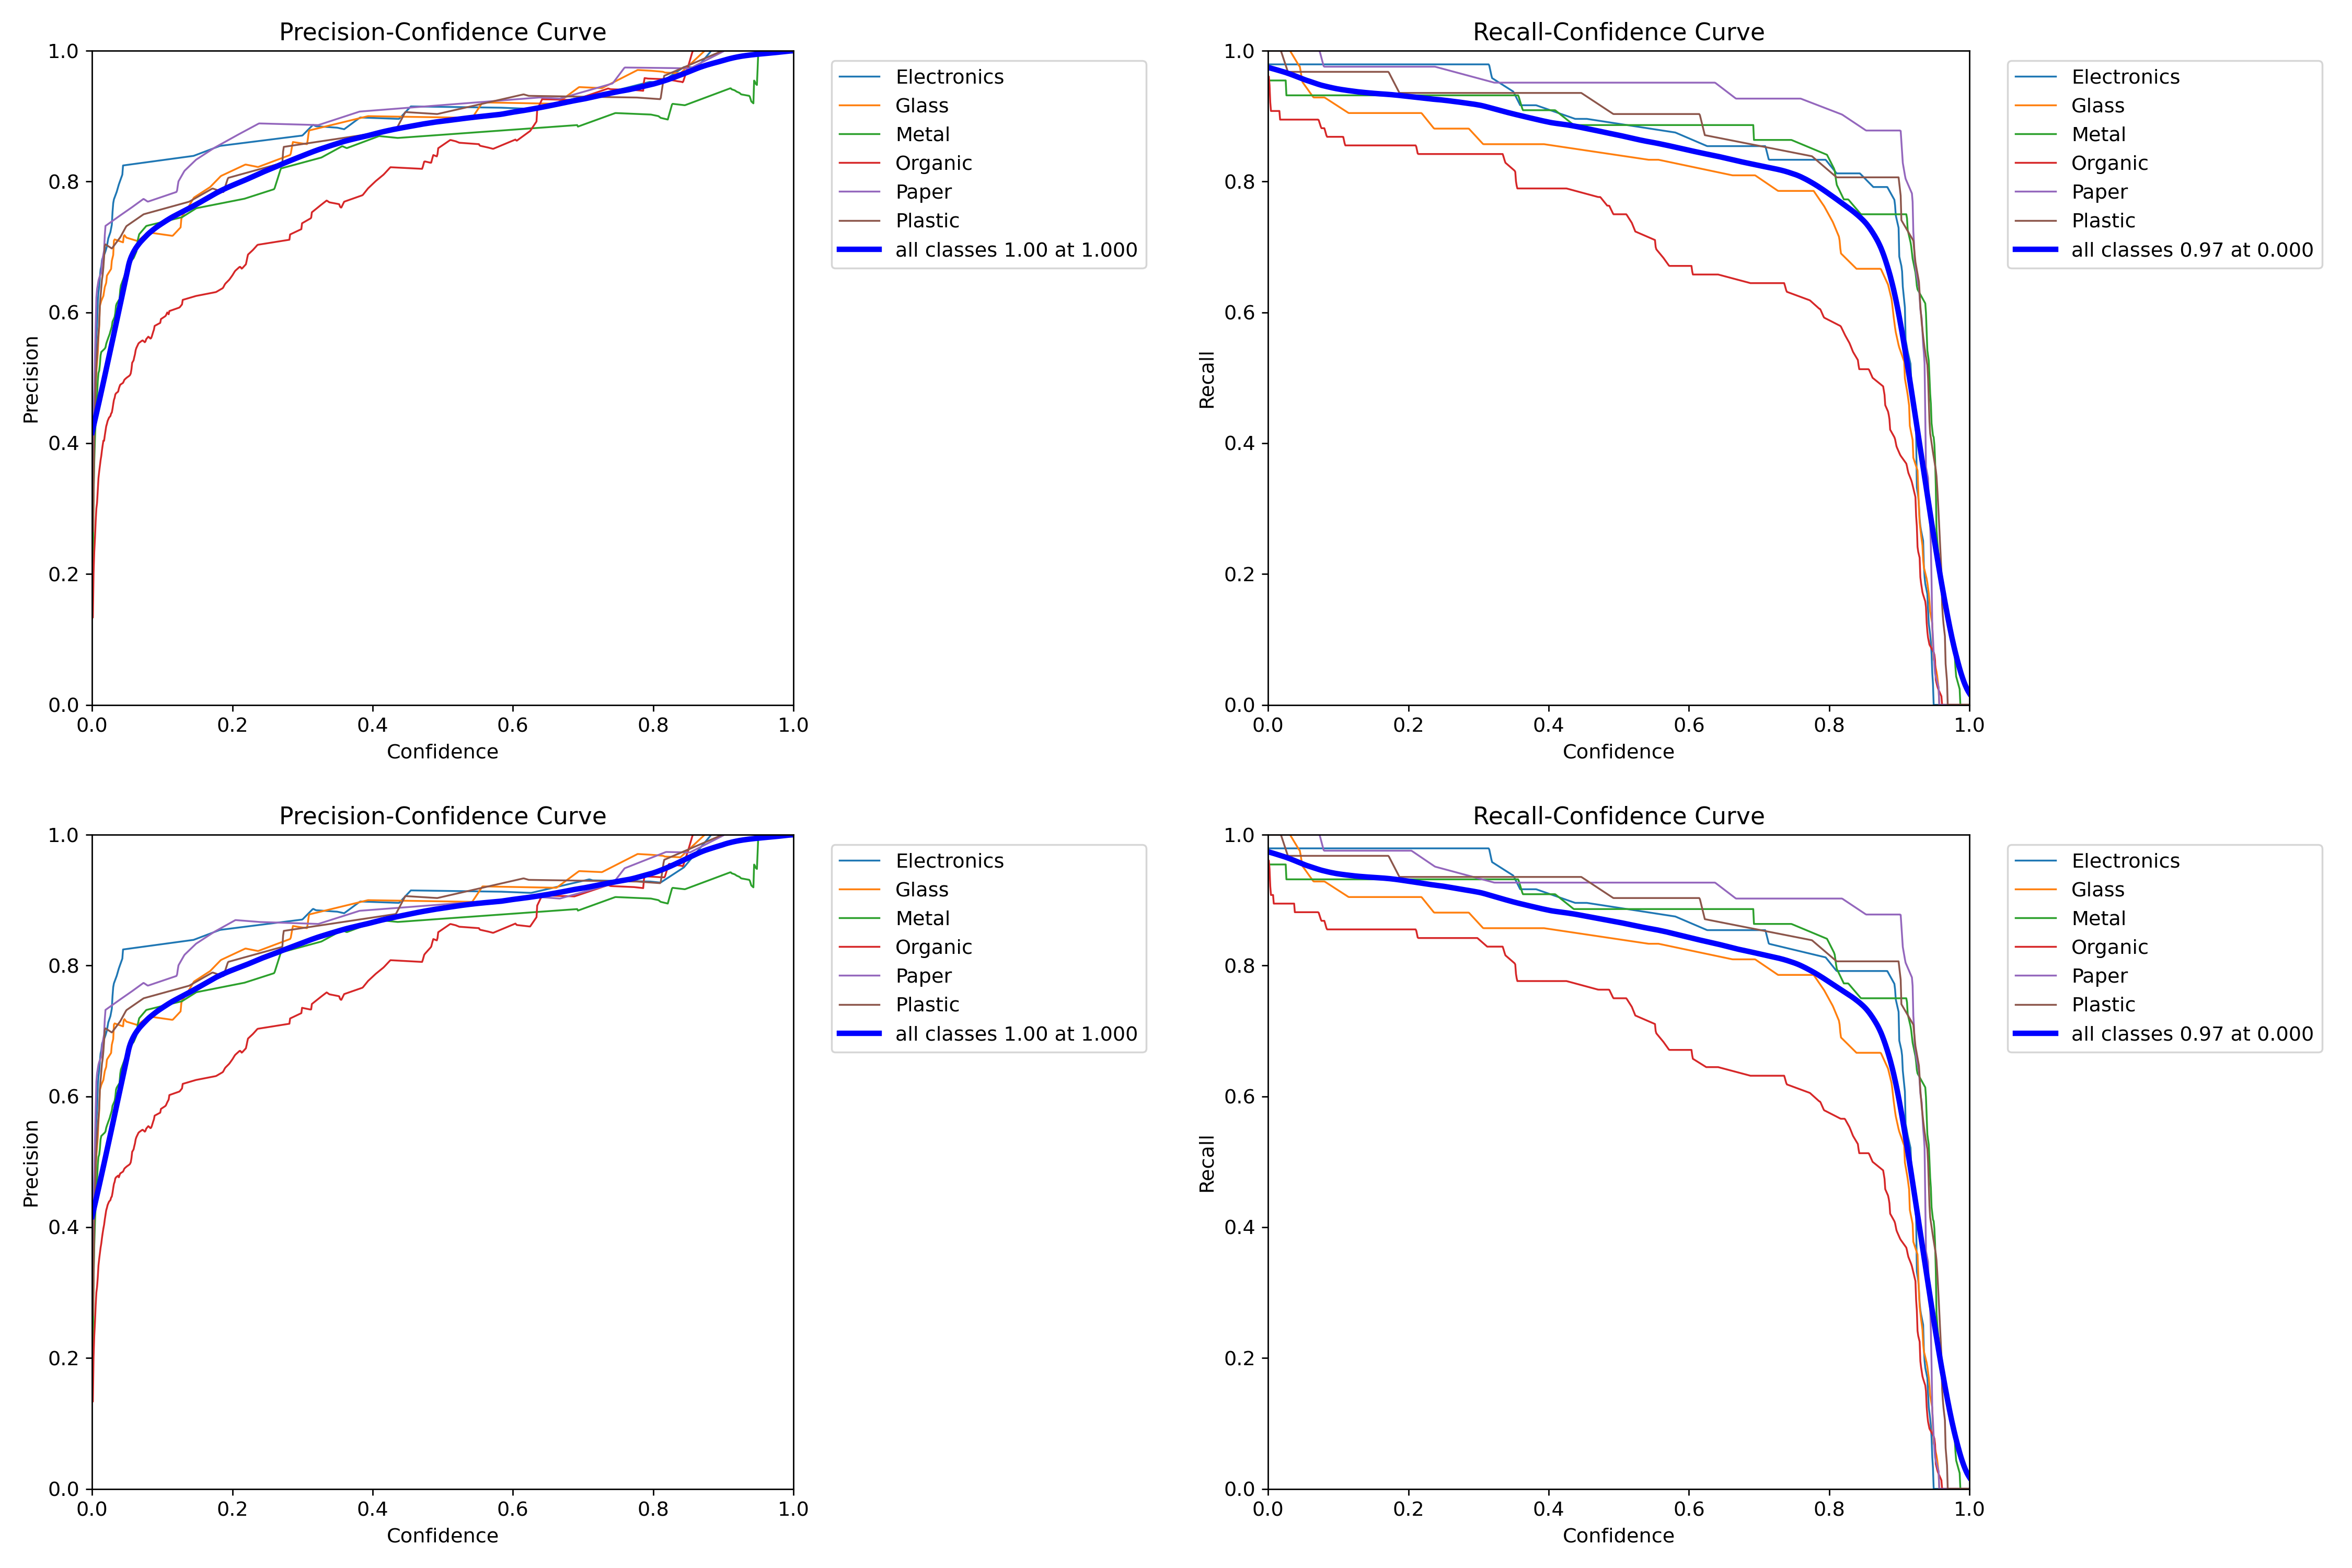

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
#Load your images using OpenCV
img1 = cv2.imread(f"{train_path}/BoxP_curve.png")
img2 = cv2.imread(f"{train_path}/BoxR_curve.png")
img3 = cv2.imread(f"{train_path}/MaskP_curve.png")
img4 = cv2.imread(f"{train_path}/MaskR_curve.png")

#Concatenate the images horizontally
top_row = cv2.hconcat([img1, img2])
botton_row = cv2.hconcat([img3, img4])

#Concatenate the two rows vertically
grid = cv2.vconcat([top_row, botton_row])
#Display the concatenated images
cv2_imshow(grid)


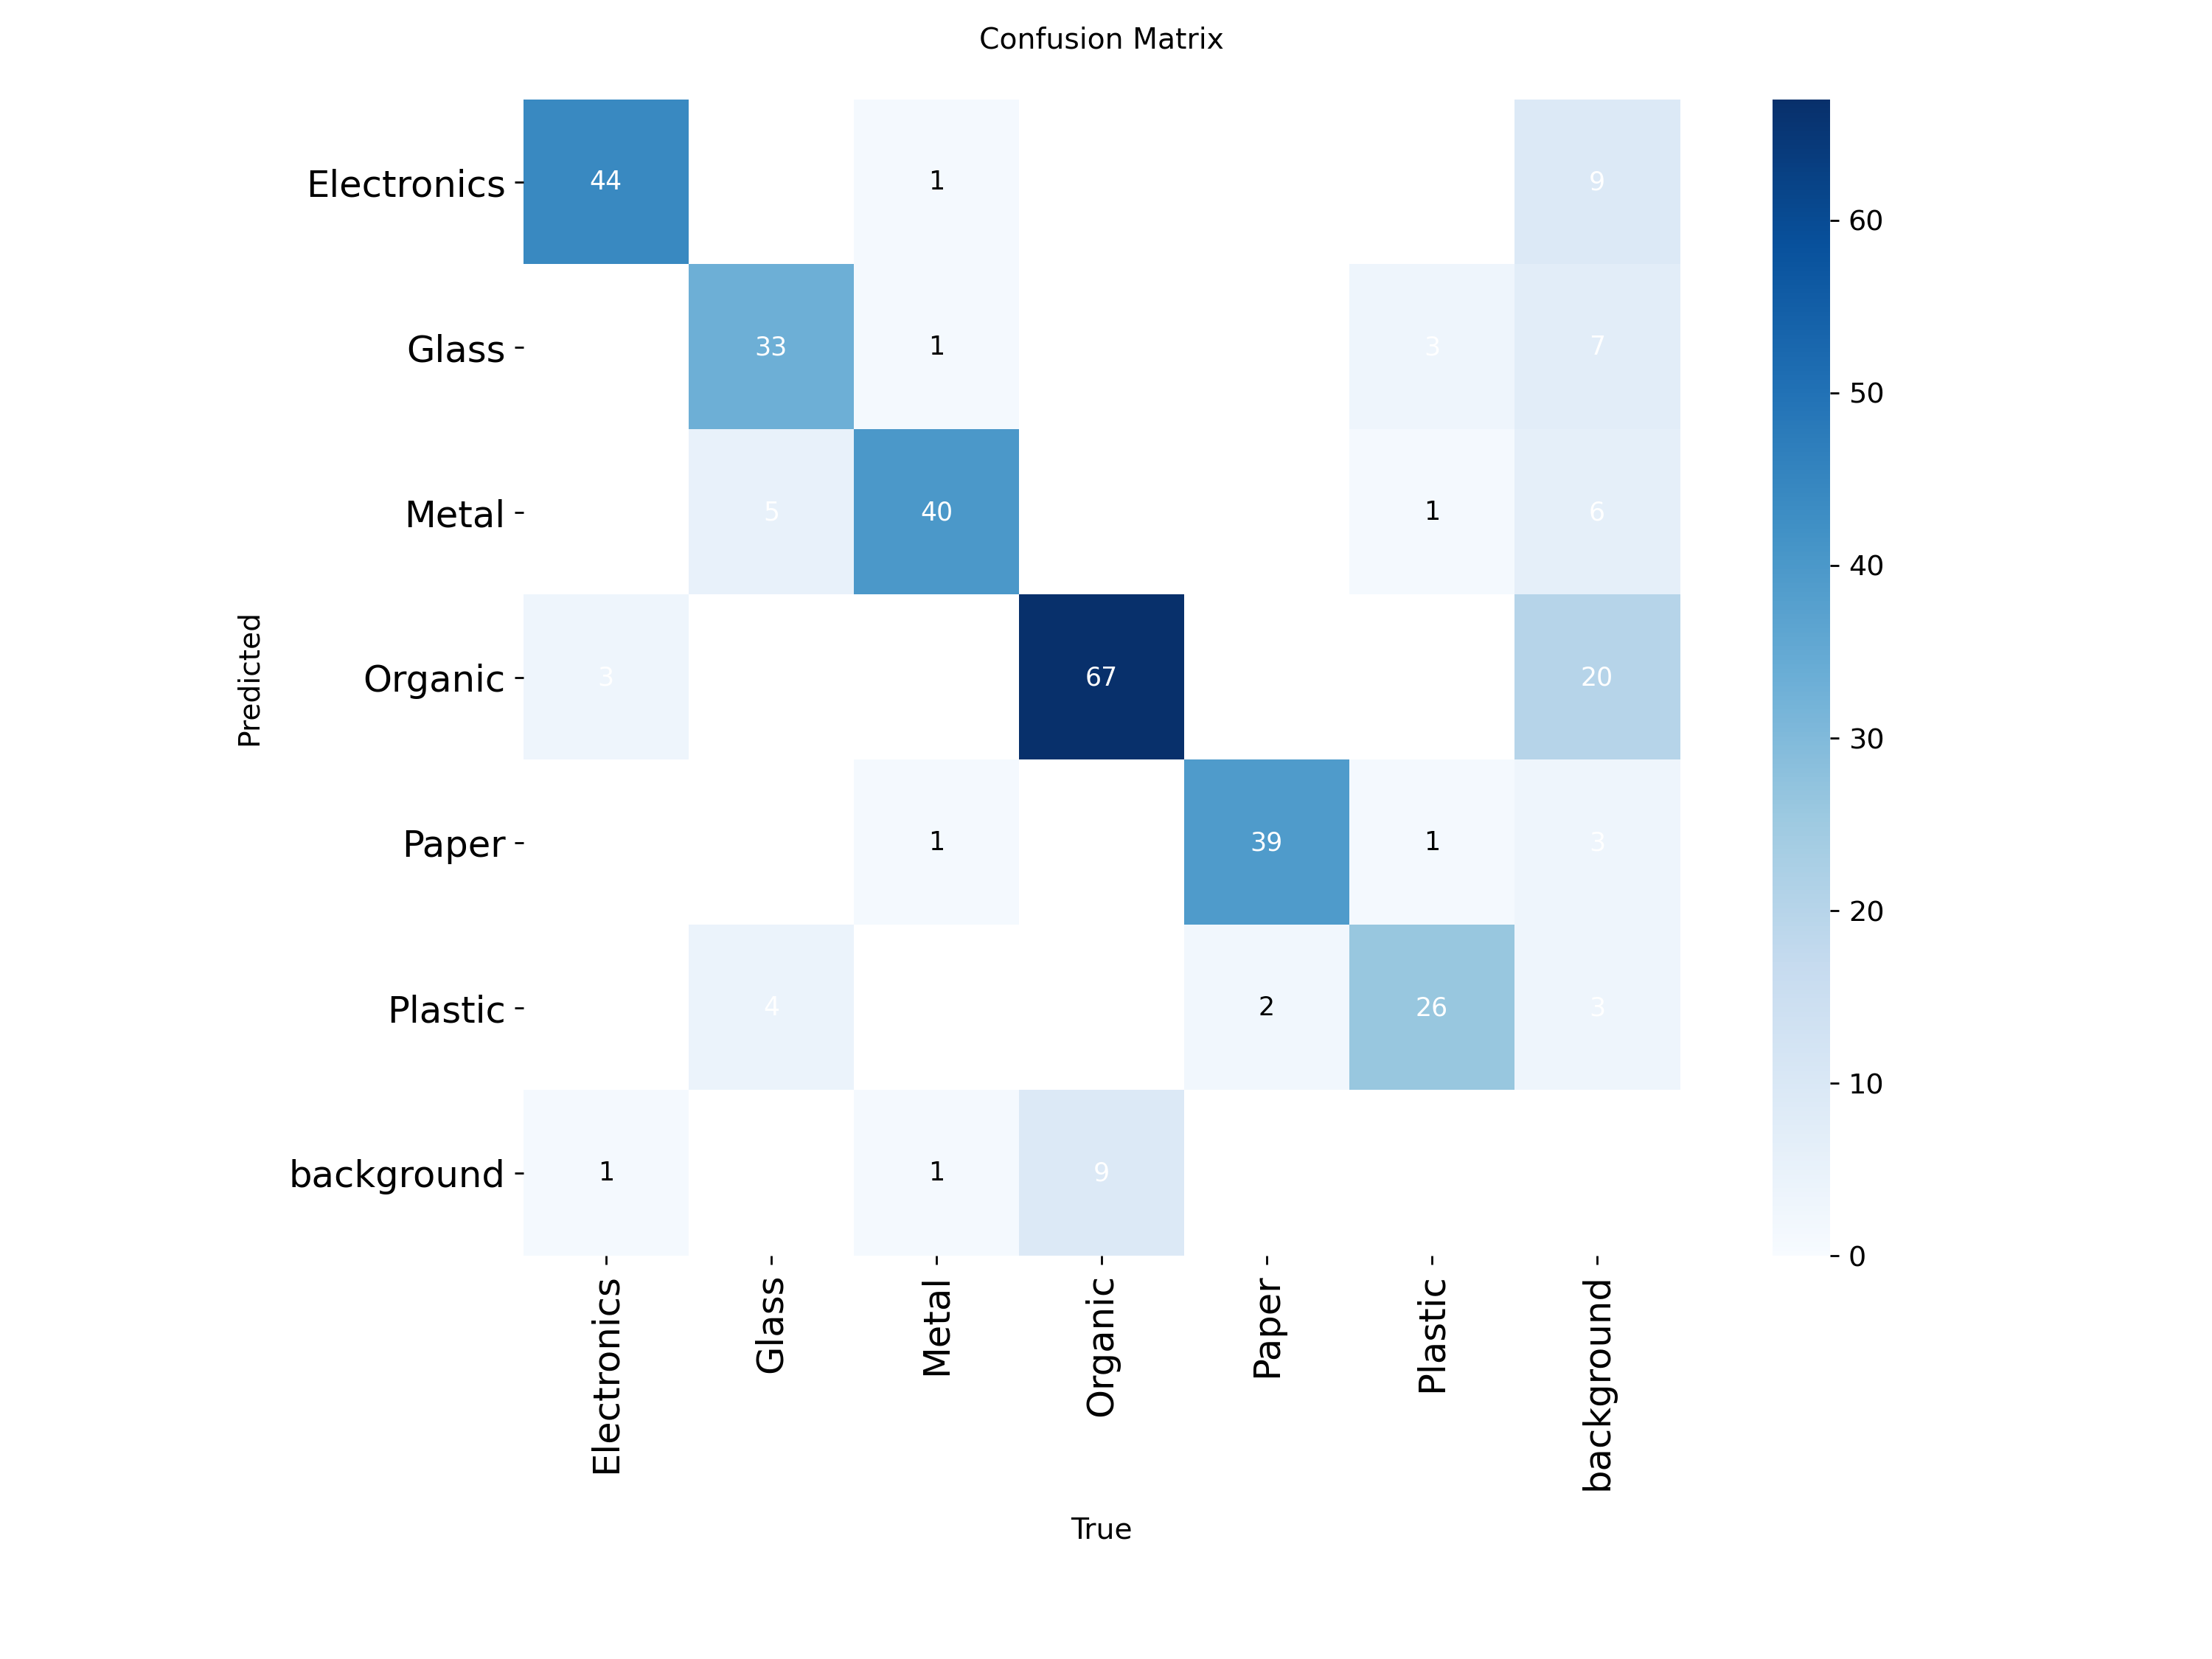

In [ ]:
Image("/content/runs/segment/train/confusion_matrix.png", width = 800)

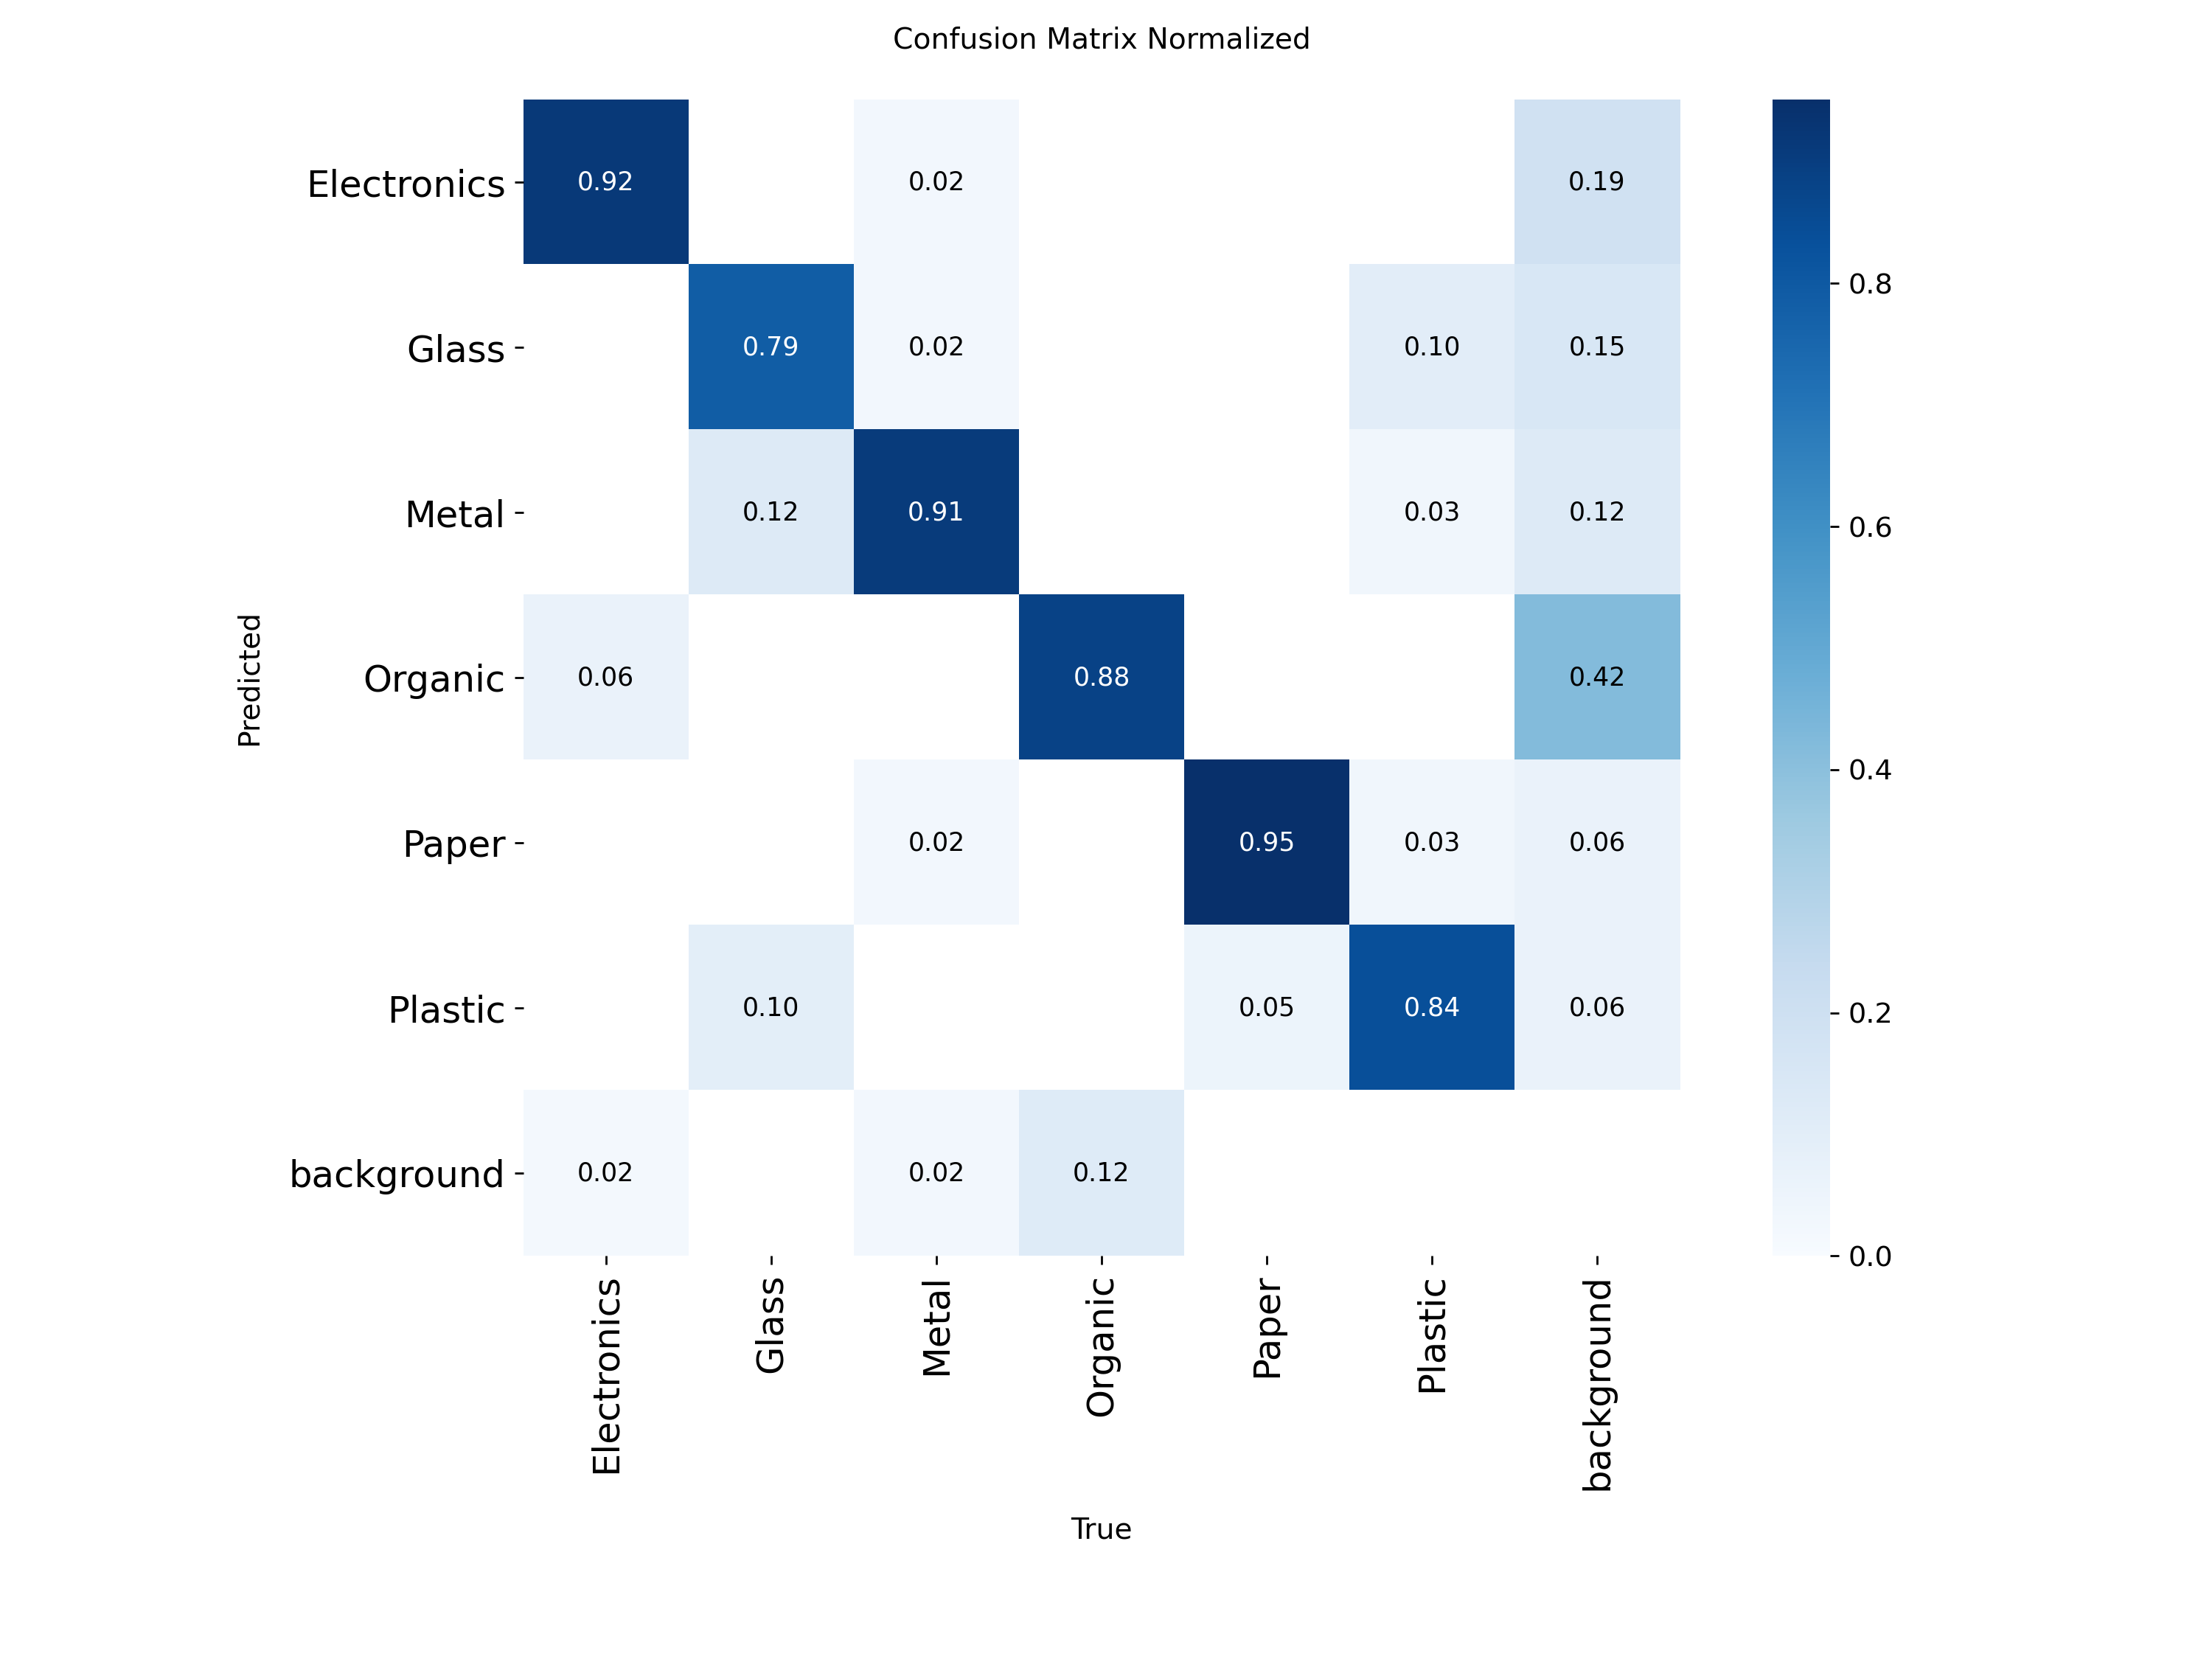

In [ ]:
Image("/content/runs/segment/train/confusion_matrix_normalized.png", width = 800)

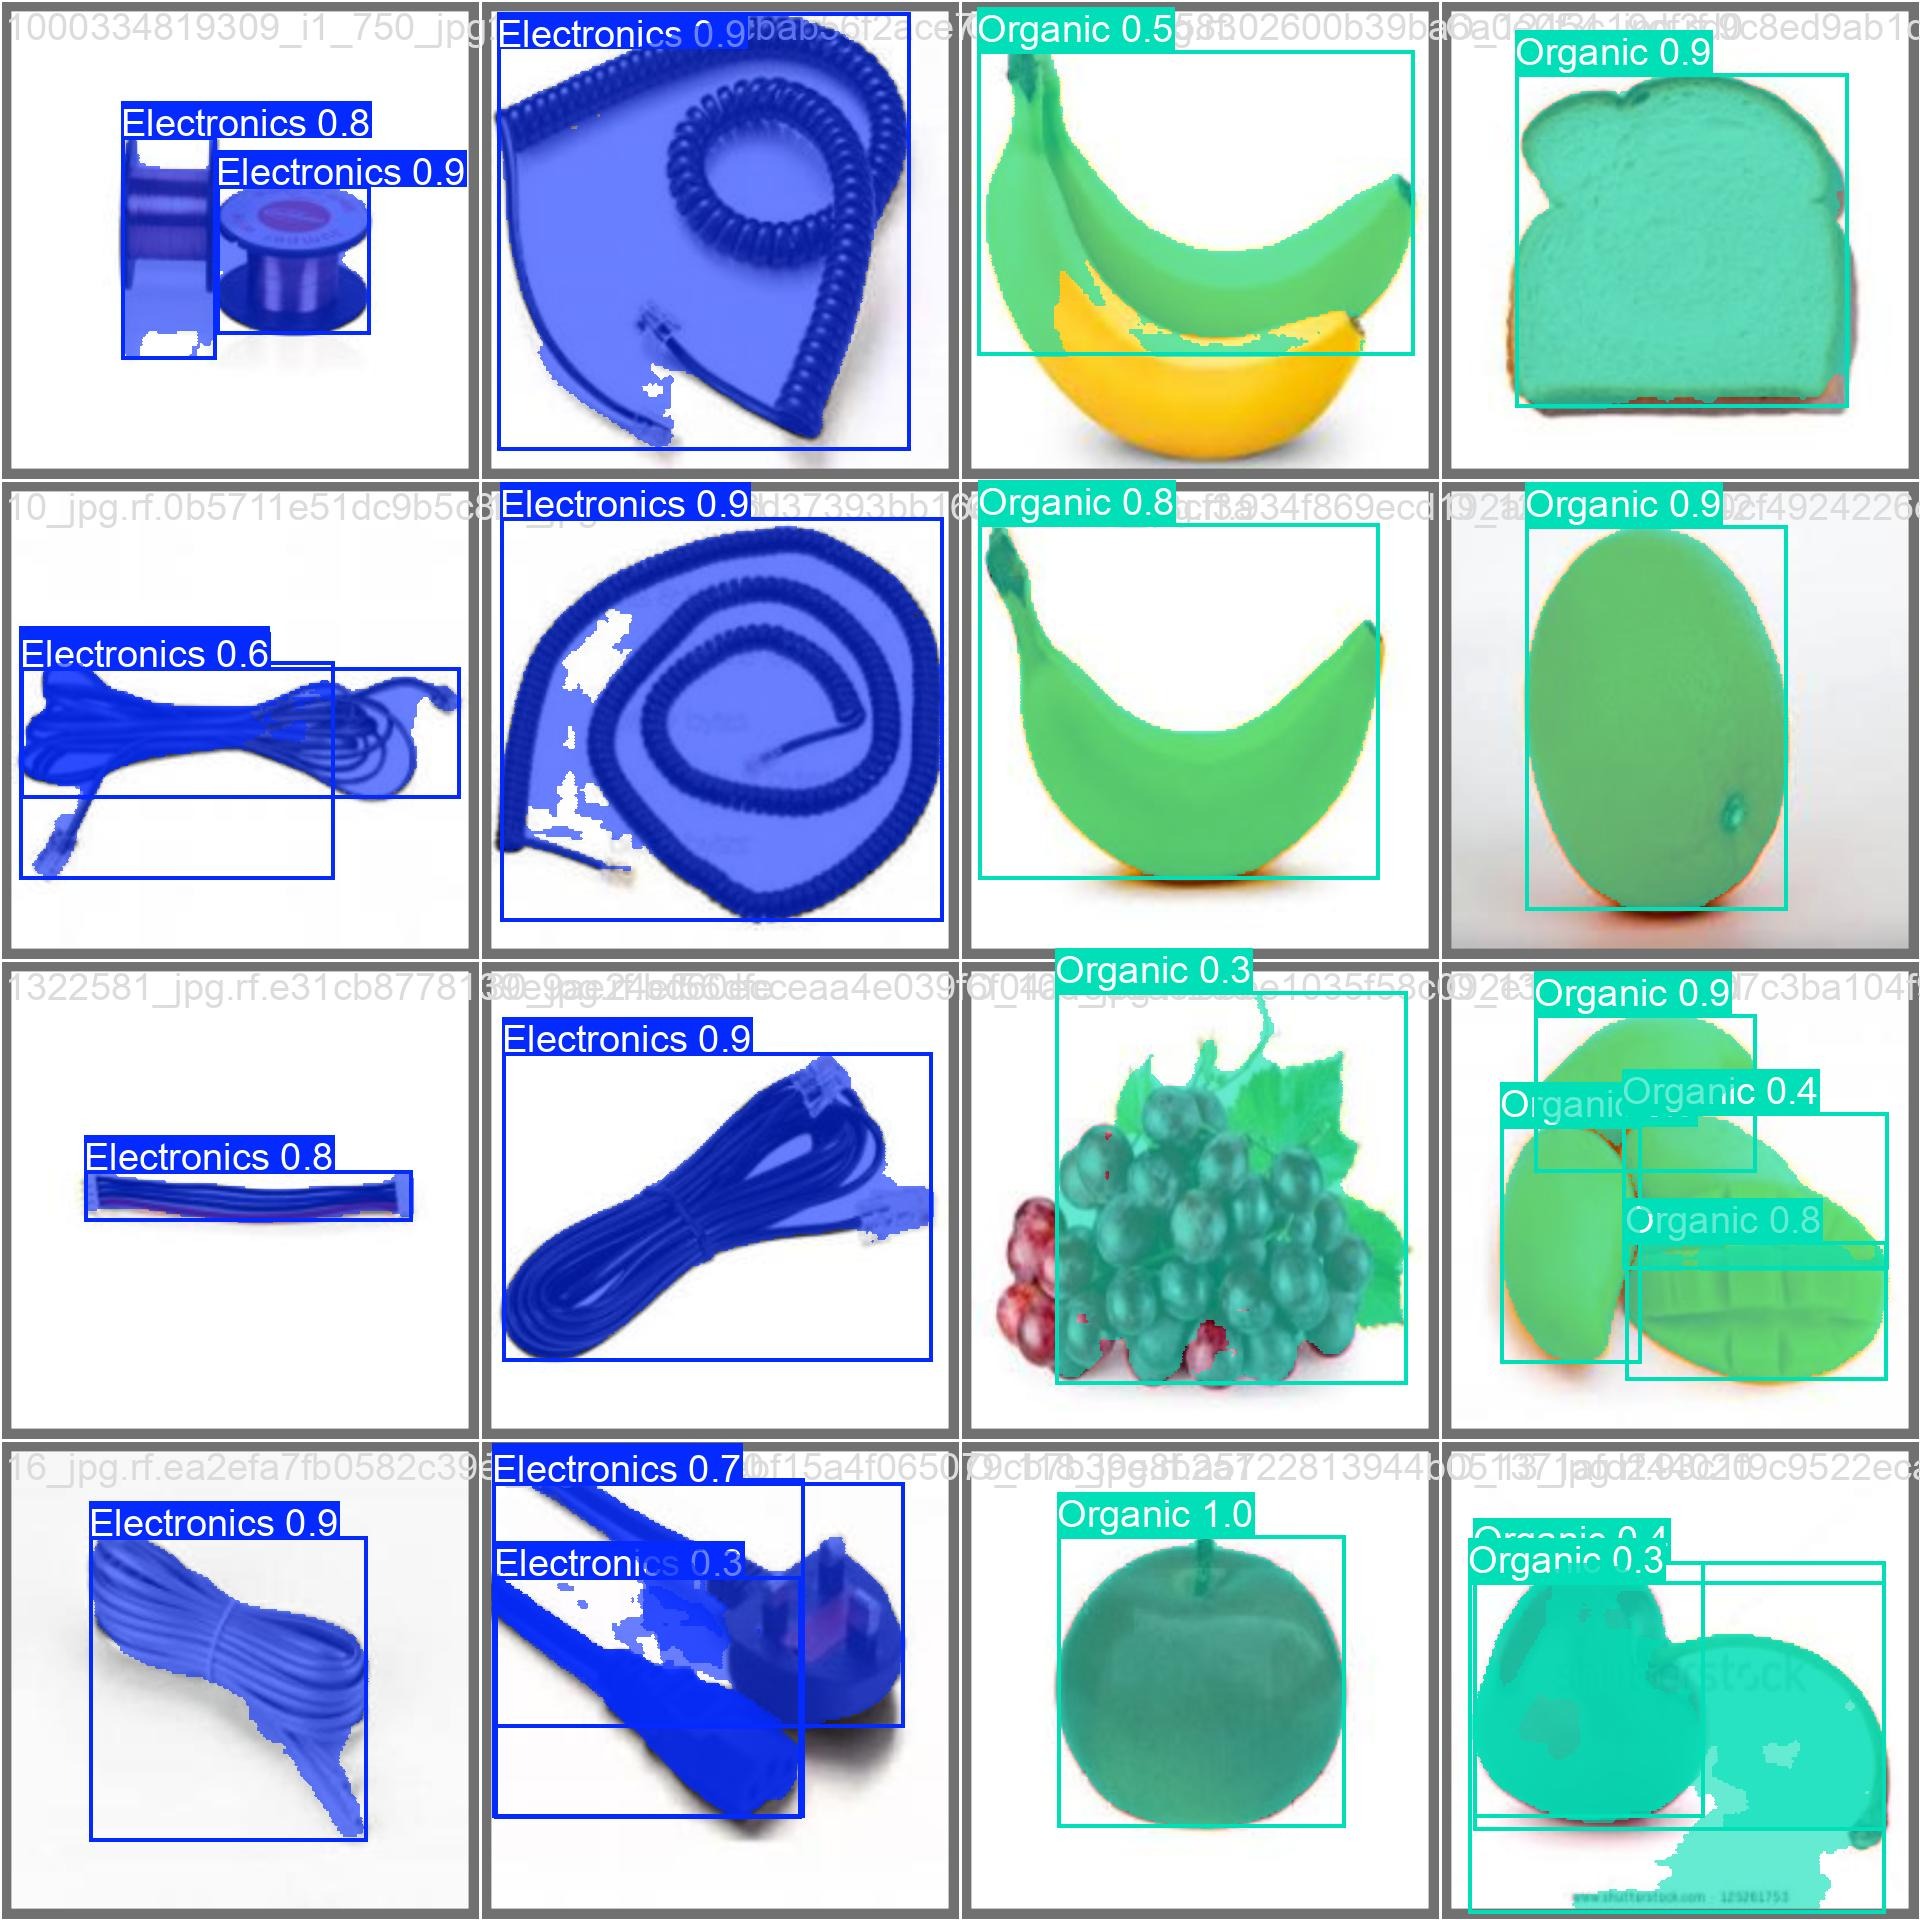

In [ ]:
Image("/content/runs/segment/train/val_batch0_pred.jpg", width = 800)

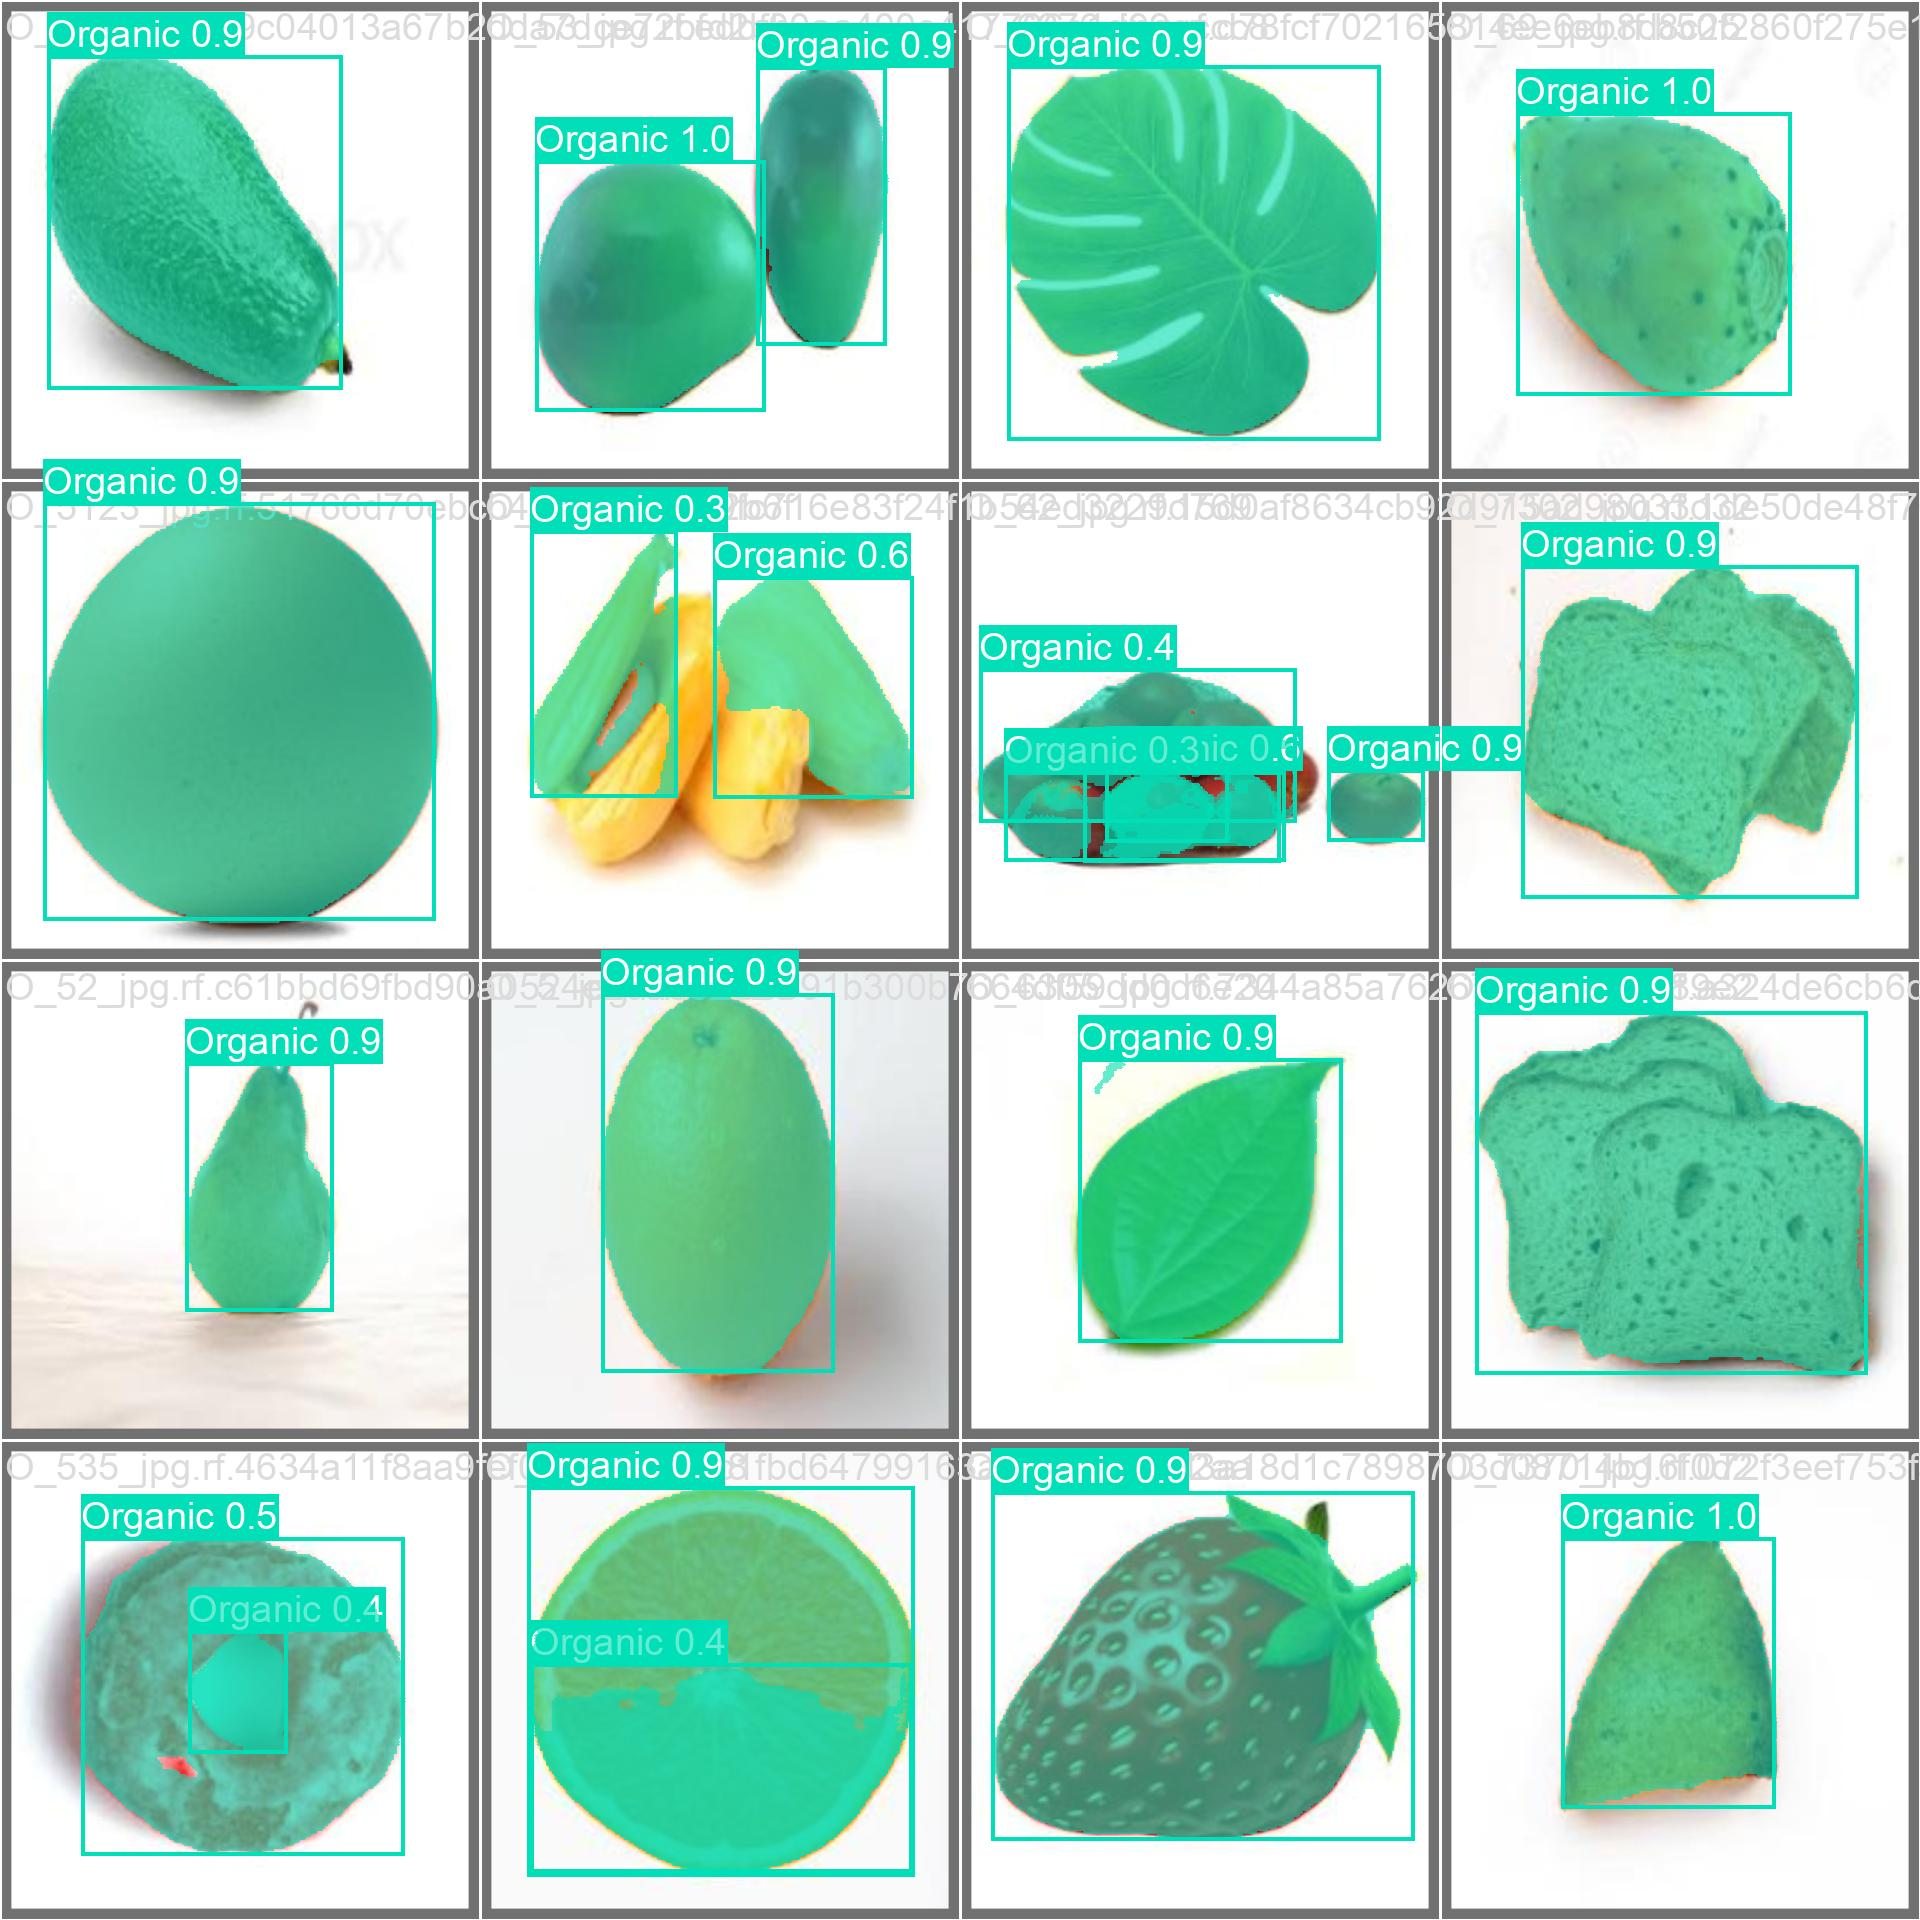

In [ ]:
Image("/content/runs/segment/train/val_batch1_pred.jpg", width = 800)

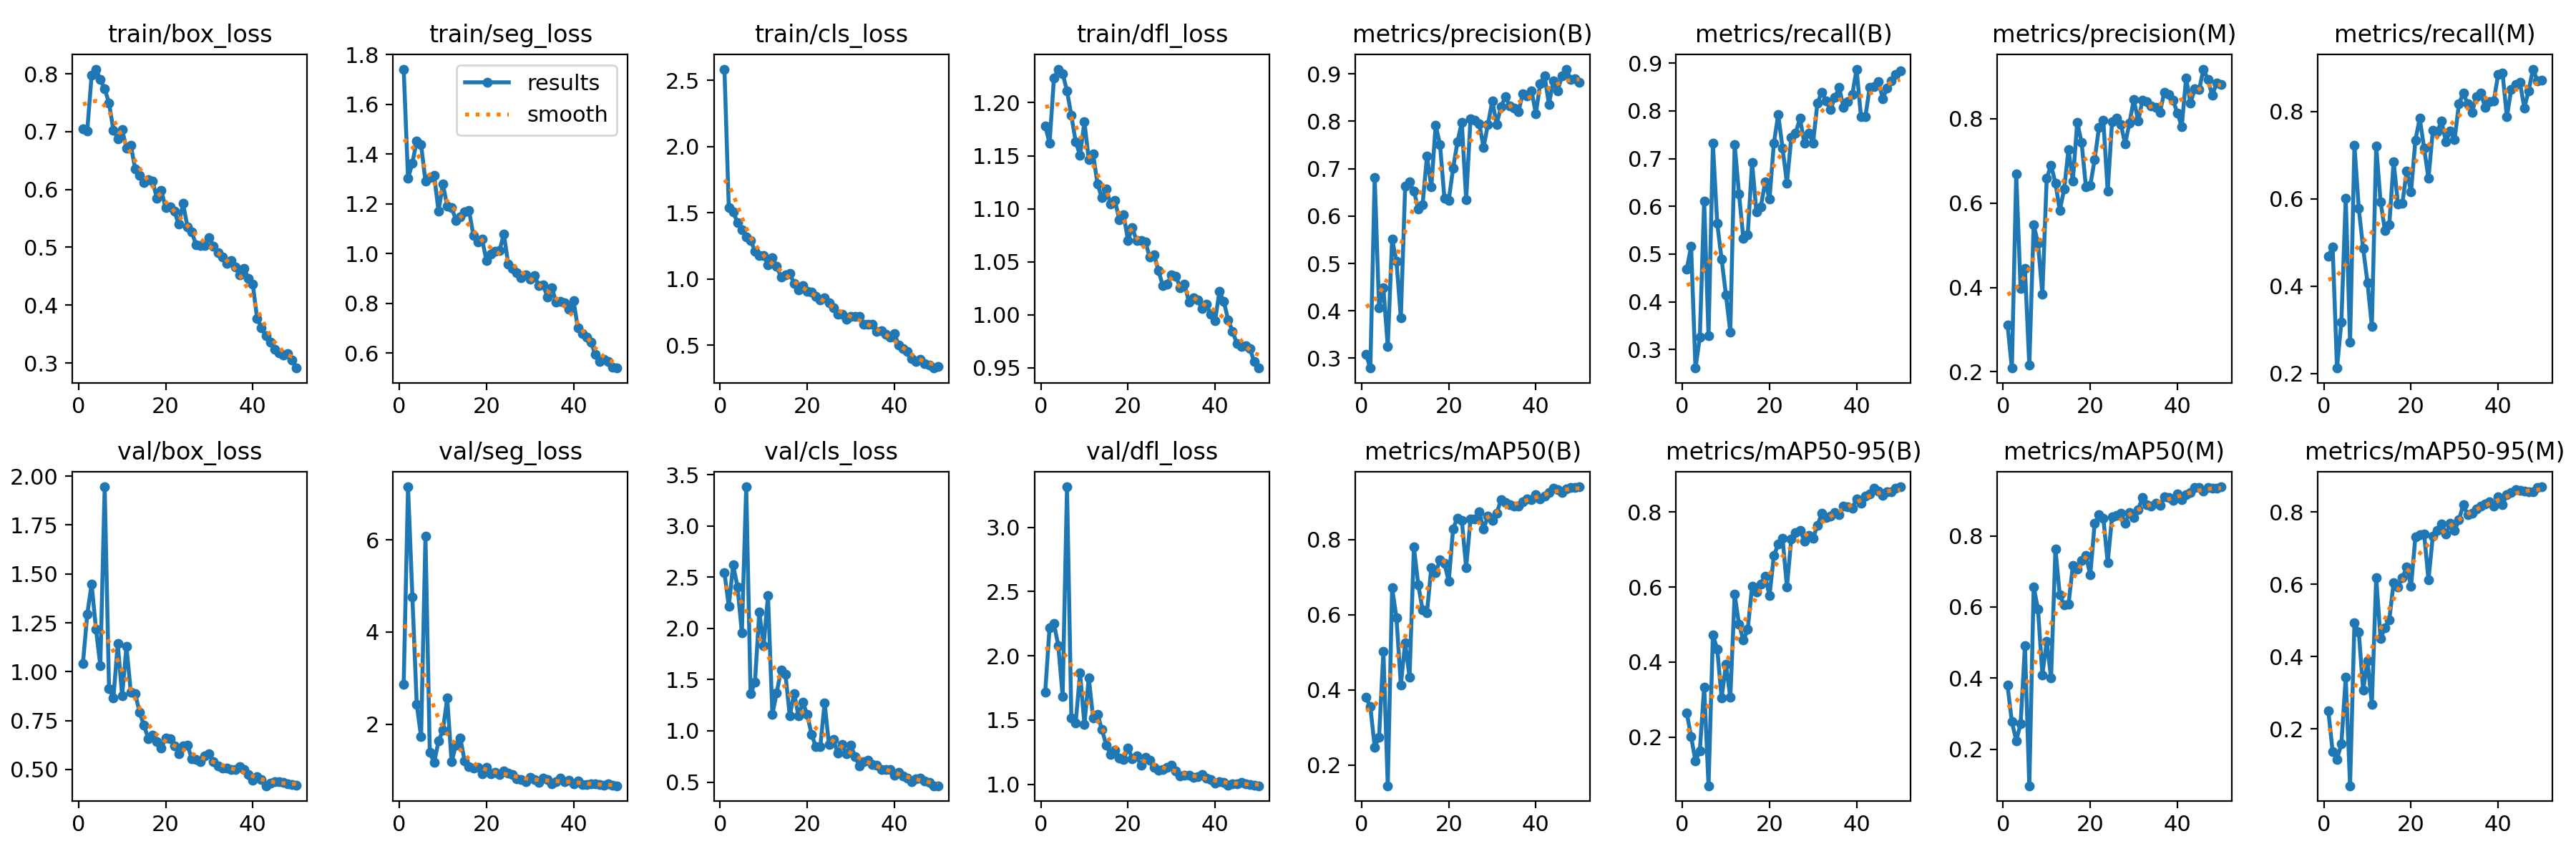

In [ ]:
Image("/content/runs/segment/train/results.png", width = 800)